## 1. Импорт библиотек и загрузка данных

In [ ]:
#загрузка необходимых библиотек
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')
%matplotlib inline 
pd.set_option('display.float_format', lambda x: '%.1f' % x)
from datetime import datetime

In [ ]:
brent = pd.read_csv('Brent.csv', sep=(';') , decimal=',', header=0)
brent.columns=['ticker','m','date','a','price','volume','d','d']
brent=brent.drop(['m','a','d','d'], axis=1)
brent['date']=brent['date'].apply(str)
brent['date']=brent['date'].apply(lambda x: datetime(int(x[:4]),int(x[4:6]),int(x[6:])) )
brent.tail(10)

,ticker,date,price,volume
2337,"ICE,BRN",2021-04-09,63.0,117.8
2338,"ICE,BRN",2021-04-11,63.3,1.4
2339,"ICE,BRN",2021-04-12,63.2,162.6
2340,"ICE,BRN",2021-04-13,64.0,139.6
2341,"ICE,BRN",2021-04-14,66.3,201.4
2342,"ICE,BRN",2021-04-15,66.8,136.3
2343,"ICE,BRN",2021-04-16,66.7,114.3
2344,"ICE,BRN",2021-04-18,66.4,2.2
2345,"ICE,BRN",2021-04-19,67.2,111.0
2346,"ICE,BRN",2021-04-20,66.5,192.0


In [ ]:
inf = pd.read_excel('INF.xlsx',sep=(';') ,header=0)
inf.columns=['date','inf']
inf['date']=pd.to_datetime(inf['date'])
inf['month']=inf.date.apply(lambda x:datetime(x.year, x.month,1))
inf.tail(10)

,date,inf,month
71,2019-08-01,99.8,2019-08-01
72,2019-09-01,99.8,2019-09-01
73,2019-10-01,100.1,2019-10-01
74,2019-11-01,100.3,2019-11-01
75,2019-12-01,100.4,2019-12-01
76,2020-01-01,100.4,2020-01-01
77,2020-02-01,100.3,2020-02-01
78,2020-03-01,100.5,2020-03-01
79,2020-04-01,100.8,2020-04-01
80,2020-05-01,100.3,2020-05-01


In [ ]:
keyrate = pd.read_excel('keyrate.xlsx',sep=(';') ,header=0)
keyrate.columns=['date','keyrate']
keyrate['date']=pd.to_datetime(keyrate['date'])
keyrate.head(10)

,date,keyrate
0,2021-04-20,4.5
1,2021-04-19,4.5
2,2021-04-16,4.5
3,2021-04-15,4.5
4,2021-04-14,4.5
5,2021-04-13,4.5
6,2021-04-12,4.5
7,2021-04-09,4.5
8,2021-04-08,4.5
9,2021-04-07,4.5


In [ ]:
exch = pd.read_excel('exchange.xlsx',sep=(';') ,header=0)
exch.columns=['date','m','exchange']
exch=exch.drop(['m'],axis=1)
exch['date']=pd.to_datetime(exch['date'])
exch.head(10)

,date,exchange
0,2021-04-20,76.2
1,2021-04-17,75.6
2,2021-04-16,77.0
3,2021-04-15,75.7
4,2021-04-14,77.3
5,2021-04-13,77.5
6,2021-04-10,77.2
7,2021-04-09,77.1
8,2021-04-08,77.8
9,2021-04-07,76.4


In [ ]:
dob = pd.read_excel('dob.xlsx',sep=(';') ,header=0)
dob.columns=['month','dob']
dob['month']=dob['month'].apply(str)
dob['month']=dob['month'].apply(lambda x: datetime(  int(x[6:]),int(x[3:5]),int(x[:2])))
dob.head(10)


,month,dob
0,2013-02-01,39939.0
1,2013-03-01,44185.0
2,2013-04-01,42762.0
3,2013-05-01,44285.0
4,2013-06-01,42965.0
5,2013-07-01,44074.0
6,2013-08-01,44504.0
7,2013-09-01,43116.0
8,2013-10-01,44707.0
9,2013-11-01,43465.0


In [ ]:
brentexch=brent.merge(exch)
brentexchkeyrate=brentexch.merge(keyrate)
brentexchkeyrate['month']=brentexchkeyrate.date.apply(lambda x:datetime(x.year, x.month,1))
brentexchkeyrateinf=brentexchkeyrate.merge(inf,on='month')
brentexchkeyrateinfdob=brentexchkeyrateinf.merge(dob)
dt=brentexchkeyrateinfdob.drop(['month','date_y'],axis=1)
dt.head

<bound method DataFrame.head of        ticker     date_x  price  volume  exchange  keyrate   inf     dob
0     ICE,BRN 2013-09-17  107.8   119.7      32.3      5.5 100.2 43116.0
1     ICE,BRN 2013-09-18  110.7   109.9      32.3      5.5 100.2 43116.0
2     ICE,BRN 2013-09-19  108.8   123.6      32.2      5.5 100.2 43116.0
3     ICE,BRN 2013-09-20  109.3    99.0      31.6      5.5 100.2 43116.0
4     ICE,BRN 2013-09-24  108.8   101.6      31.9      5.5 100.2 43116.0
5     ICE,BRN 2013-09-25  108.1   115.7      31.8      5.5 100.2 43116.0
6     ICE,BRN 2013-09-26  109.2    85.2      31.9      5.5 100.2 43116.0
7     ICE,BRN 2013-09-27  108.4   112.8      32.2      5.5 100.2 43116.0
8     ICE,BRN 2013-10-01  106.9    54.2      32.5      5.5 100.6 44707.0
9     ICE,BRN 2013-10-02  108.0    48.6      32.3      5.5 100.6 44707.0
10    ICE,BRN 2013-10-03  107.7    45.6      32.3      5.5 100.6 44707.0
11    ICE,BRN 2013-10-04  108.5    40.4      32.1      5.5 100.6 44707.0
12    ICE,BRN 2013-

## 2. Описание, анализ и визуализация данных:

Выведем информацию по нашим данным

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 1286
Data columns (total 8 columns):
ticker      1287 non-null object
date_x      1287 non-null datetime64[ns]
price       1287 non-null float64
volume      1287 non-null float64
exchange    1287 non-null float64
keyrate     1287 non-null float64
inf         1287 non-null float64
dob         1287 non-null float64
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 90.5+ KB


Выведем описание информации по столбцам

In [ ]:
dt.describe()

,price,volume,exchange,keyrate,inf,dob
count,1287.0,1287.0,1287.0,1287.0,1287.0,1287.0
mean,65.6,151.8,58.1,8.8,100.5,45383.3
std,21.5,56.1,11.7,2.4,0.5,1731.3
min,19.5,0.0,31.6,5.5,99.5,39739.7
25%,50.8,117.3,56.4,7.2,100.2,44579.0
50%,61.2,151.0,62.4,8.0,100.4,45309.2
75%,73.7,184.2,65.4,10.5,100.6,46406.8
max,114.9,522.6,83.6,17.0,103.8,48443.9


Проверим данные на нулевые значения

In [ ]:
dt.isnull().sum()

ticker      0
date_x      0
price       0
volume      0
exchange    0
keyrate     0
inf         0
dob         0
dtype: int64

Медианное цены нефти = 61.22


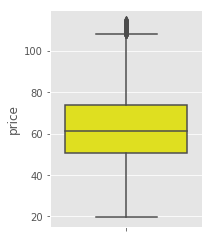

In [ ]:
print("Медианное цены нефти = "+str(dt.price.median()))

plt.subplot(1,2,2)
ax = sns.boxplot(y=dt.price, color='yellow')

plt.show()

In [ ]:
dt_corruption = dt["price"]
Q1 = dt_corruption.quantile(0.25)
Q3 = dt_corruption.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower bound: ' + str(lower_bound))
print('Upper bound: ' + str(upper_bound))
print('Q1:', Q1)
print('Q3:', Q3)

Lower bound: 16.49750000000001
Upper bound: 107.95749999999998
('Q1:', 50.795)
('Q3:', 73.66)


Определили нижнюю и верхнюю границу, после которых значение можно считать выпадающим. Посмотрим, сколько у нас выпадающих значений.

In [ ]:
outliers_vector = (dt_corruption < (lower_bound)) | (dt_corruption > (upper_bound))
outliers_vector = dt_corruption[outliers_vector]
outliers_vector.index.values

array([  1,   2,   3,   4,   5,   6,   7,   9,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  24,  25,  26,  33,  34,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  65,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  91,  94, 102, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       159, 162, 164])

In [ ]:
dt.drop(index=outliers_vector.index.values,inplace=True)
dt

Корреляционная матрица, которая позволяет увидеть зависимость признаков друг от друга. Самая большая зависимость оказалась между Price и Exchange.


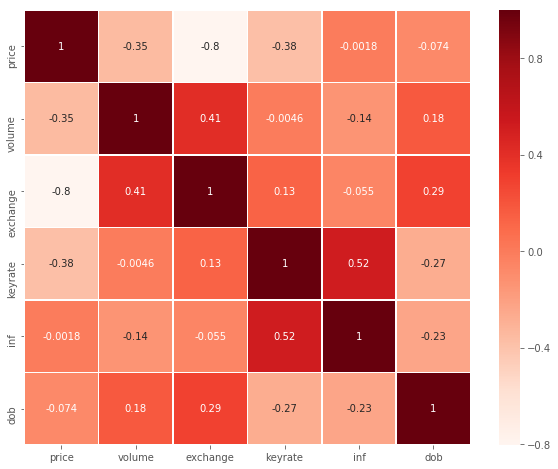

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(dt.corr(), annot = True, linewidths=.5, cmap = 'Reds')
plt.show()

In [ ]:
numerical_columns = dt.columns[dt.dtypes != 'object'].drop(['price' ,'date_x'])
numerical_columns

Index([u'volume', u'exchange', u'keyrate', u'inf', u'dob'], dtype='object')

## 4. Расчет цены нефти по внешним факторам

Так как между Price и Exchange был самый большой коэффициент корреляции, то попробуем начала построить парную регрессию между этими параметрами.

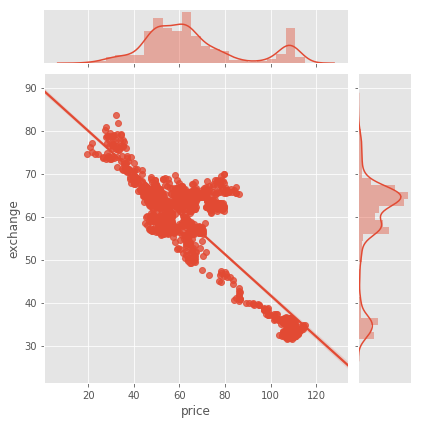

In [ ]:
sns.jointplot(x="price",y="exchange",data=dt,kind="reg")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = np.array(dt['exchange'])
y = np.array(dt['price'])
reg = LinearRegression()
model = reg.fit(X.reshape(-1,1),y)
print('Intercept = '+ str(model.intercept_))
print('Коэффицент регрессии = '+ str(model.coef_[0]))
print('R^2 = '+str(model.score(X.reshape(-1,1),y)))
print('MSE='+str(mean_squared_error(X.reshape(-1,1),y)))


Intercept = 150.57745028868743
Коэффицент регрессии = -1.47507277627584
R^2 = 0.6443095727232073
MSE=673.7501150743899


Так как rscore достаточно низкий, построим множественную регрессию

In [ ]:
X = dt.drop(['ticker','price','date_x'], axis=1).get_values()
y = dt['price'].get_values()

In [ ]:
import statsmodels.api as sm

#линейная регрессия
est = sm.OLS(y, X)
est = est.fit()
print(est.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.160e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:49:08   Log-Likelihood:                         -4270.7
No. Observations:                1180   AIC:                                      8551.
Df Residuals:                    1175   BIC:                                      8577.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print ('R^2 = '+str(est.rsquared))

R^2 = 0.9801384053187657


In [ ]:
from sklearn.metrics import mean_squared_error
MSE=est.mse_resid
print('MSE='+str(MSE))

MSE=81.83995883627536


In [ ]:
results_ols = pd.DataFrame()
results_ols['feature'] = ['volume','exchange','keyrate','inf','dob']
results_ols['coefs'] = est.params
results_ols

,feature,coefs
0,volume,-0.0125
1,exchange,-1.4841
2,keyrate,-2.2327
3,inf,1.4374
4,dob,0.0006


## Лассо

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lasso_model = Lasso().fit(X_train,y_train)
pred=lasso_model.predict(X_test)

In [ ]:
print('R^2='+str(lasso_model.score(X,y)))

R^2=0.7284355684407793


In [ ]:
MSE=mean_squared_error(y_test,pred)
print('MSE='+str(MSE))

MSE=81.03083907466383


## Ридж 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_model.score(X,y)
print('R^2='+str(ridge_model.score(X,y)))

R^2=0.7447092290144955


In [ ]:
results_ridge = pd.DataFrame()
results_ridge['feature'] = dt.columns[dt.dtypes != 'object'].drop(['price' ,'date_x'])
results_ridge['coefs'] = ridge_model.coef_
results_ridge

,feature,coefs
0,volume,-0.0
1,exchange,-1.4
2,keyrate,-2.5
3,inf,4.3
4,dob,0.0


In [ ]:
ridge_model = Ridge().fit(X_train,y_train)

y_pred = ridge_model.predict(X_train)

print("predict: ", y_pred[0:10])
print("real: ", y_train[0:10])

('predict: ', array([ 55.26029727,  65.86545368,  66.09926403,  45.8147452 ,
        33.29644191, 101.94865675,  60.83167681,  49.45600037,
        70.21313814,  74.63324151]))
('real: ', array([ 49.58,  52.5 ,  62.86,  49.29,  33.12, 106.57,  61.31,  50.96,
        68.52,  61.92]))


In [ ]:
y_pred = ridge_model.predict(X_test)
MSEtest = (mean_squared_error(y_test,y_pred))
print("test error: ", MSEtest)

('test error: ', 88.02851431629837)


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


def train_validate_model(model, X,y , grid_search_params):
       
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 123)
    
    model_grid = GridSearchCV(model, 
                              grid_search_params,
                              scoring = make_scorer(mean_squared_error), # Установка метрики по которой будут сравниваться модели
                              cv=5, n_jobs=-1,verbose= 0)
    
    model_grid.fit(X_train, y_train)

    # Переменные для вывода и для сохранения
    model_type = str(type(model)).split('.')[-1].replace("'>",'') # Выделение названия модели из type(model)

    model_info = {
        'model': model_type,
        'MSE' : model_grid.best_score_,
        'Best params': model_grid.best_params_
        }

    print('Тип модели: ', model_type)
    print('MSE: {}'.format(model_grid.best_score_))
    print('Best params: ',model_grid.best_params_)
    print('-----------------------------------\n')
    return model_grid.best_estimator_, model_info

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dectree = DecisionTreeRegressor()
randfor = RandomForestRegressor()

dectree_params = {'min_samples_split':np.arange(2,20)}
randfor_params = {'min_samples_split':np.arange(2,20)}

models = [(dectree, dectree_params), (randfor, randfor_params)]

In [ ]:
model_info = []
estimators = []
for model in models:
    estimator, info = train_validate_model(model[0], X, y, model[1])
    model_info.append(info)
    estimators.append(estimator)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('\xd0\xa2\xd0\xb8\xd0\xbf \xd0\xbc\xd0\xbe\xd0\xb4\xd0\xb5\xd0\xbb\xd0\xb8: ', 'DecisionTreeRegressor')
MSE: 9.02231917373
('Best params: ', {'min_samples_split': 2})
-----------------------------------

('\xd0\xa2\xd0\xb8\xd0\xbf \xd0\xbc\xd0\xbe\xd0\xb4\xd0\xb5\xd0\xbb\xd0\xb8: ', 'RandomForestRegressor')
MSE: 8.64155497214
('Best params: ', {'min_samples_split': 17})
-----------------------------------



/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
